In [50]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [51]:
#Import dataset
df=pd.read_csv('ss.csv')
df.head()

,Disease,Disease_label,Mean_R,Mean_G,Mean_B,Mean_H,Mean_S,Mean_V,Mean_L,Mean_A,...,G/B,G/R,R/G,GLI,VARI,Logsig,(G-B)/(R+G+B),(G+B)/R,(R+G+B)/R,b*/a*
0,BS,1,0.458183,0.367428,0.256259,0.090664,0.468456,0.458183,40.988342,5.403956,...,1.433816,0.801925,1.247000,0.014086,-0.159400,0.000362,0.102757,1.361219,2.361219,3.658573
1,BS,1,0.444957,0.361174,0.254726,0.091773,0.452171,0.444957,40.156262,4.783251,...,1.417890,0.811705,1.231974,0.015938,-0.151945,0.000363,0.100341,1.384179,2.384179,3.938288
2,BS,1,0.432797,0.346328,0.264451,0.081628,0.427243,0.432870,38.814850,5.943410,...,1.309609,0.800209,1.249674,-0.003304,-0.168007,0.000340,0.078458,1.411238,2.411238,2.612775
3,BS,1,0.381374,0.315278,0.241140,0.090207,0.401574,0.381425,35.118157,3.997627,...,1.307448,0.826689,1.209644,0.006418,-0.145103,0.000326,0.079056,1.458981,2.458981,3.439206
4,BS,1,0.534813,0.426064,0.307500,0.085403,0.456898,0.534890,47.464902,6.699040,...,1.385573,0.796660,1.255240,0.005793,-0.166441,0.000415,0.093477,1.371628,2.371628,3.114831


In [52]:
#Removing Disease column
X=df.drop(['Disease_label','Disease'], axis = 1)
y = df['Disease_label']

In [64]:
#Split the data by Train : Test =80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#Logistic Regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.87
Accuracy of Logistic regression classifier on test set: 0.79


In [61]:
# Decision Tree classifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


In [62]:
# KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.84


In [63]:
#Confusion Matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[20  4]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.80      0.84      0.82        19

    accuracy                           0.84        43
   macro avg       0.83      0.84      0.84        43
weighted avg       0.84      0.84      0.84        43



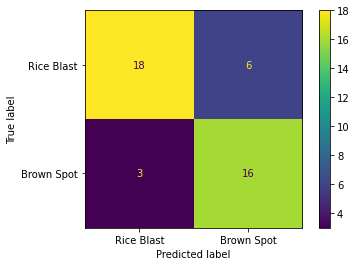

In [58]:
plot_confusion_matrix(knn,
                     X_test,
                     y_test,
                     
                     display_labels=["Rice Blast","Brown Spot"])